In [1]:
import numpy as np
from numpy import asarray

In [2]:
data = [[3,3,2,1,0],
        [0,0,1,3,1],
        [3,1,2,2,3],
        [2,0,0,2,2],
        [2,0,0,0,1]]

In [3]:
data=np.asarray(data)

In [4]:
data=data.reshape(1,5,5,1)

In [5]:
kernel = [[[[0]], [[1]], [[2]]],
           [[[2]], [[2]], [[0]]],
           [[[0]], [[1]], [[2]]]]

In [6]:
wt = [asarray(kernel), asarray([0.0])]


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D

model = Sequential()
model.add(Conv2D(1,(3,3), input_shape=(5,5,1)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 3, 3, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.set_weights(wt)
yhat = model.predict(data)
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[12.0, 12.0, 17.0]
[10.0, 17.0, 19.0]
[9.0, 6.0, 14.0]


In [9]:
model = Sequential()
model.add(Conv2D(1,(3,3), strides=(2,2), input_shape=(5,5,1)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 2, 2, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.set_weights(wt)
yhat=model.predict(data)
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[12.0, 17.0]
[9.0, 14.0]


In [11]:
model = Sequential()
model.add(Conv2D(1,(3,3), padding='same', input_shape=(5,5,1)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.set_weights(wt)
yhat=model.predict(data)
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[6.0, 14.0, 17.0, 11.0, 3.0]
[14.0, 12.0, 12.0, 17.0, 11.0]
[8.0, 10.0, 17.0, 19.0, 13.0]
[11.0, 9.0, 6.0, 14.0, 12.0]
[6.0, 4.0, 4.0, 6.0, 4.0]


In [13]:
from keras.layers import MaxPooling2D
model = Sequential()
model.add(Conv2D(1,(3,3), padding='same', input_shape=(5,5,1)))
model.add(MaxPooling2D((2,2)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 1)          0         
 )                                                               
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.set_weights(wt)
yhat=model.predict(data)
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[14.0, 17.0]
[11.0, 19.0]


In [15]:
from keras.layers import AveragePooling2D
model = Sequential()
model.add(Conv2D(1,(3,3), padding='same', input_shape=(5,5,1)))
model.add(AveragePooling2D((2,2)))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
 average_pooling2d (AverageP  (None, 2, 2, 1)          0         
 ooling2D)                                                       
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.set_weights(wt)
yhat=model.predict(data)
for r in range(yhat.shape[1]):
    print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

[11.5, 14.25]
[9.5, 14.0]


In [17]:
from keras.layers import Flatten
model = Sequential()
model.add(Conv2D(1,(3,3), padding='same', input_shape=(5,5,1)))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 5, 5, 1)           10        
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 1)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4)                 0         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.set_weights(wt)
yhat=model.predict(data)
print(yhat)

[[14. 17. 11. 19.]]


In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as p

In [20]:
img_path = 'img.jpeg'
img=tf.keras.preprocessing.image.load_img(img_path,target_size=(224,224))
img = tf.keras.preprocessing.image.img_to_array(img)
img=np.expand_dims(img, axis=0)

In [21]:
kernel_size = (3,3)
strides = (1,1)
padding = 'valid'

In [22]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=kernel_size, strides=strides,padding=padding),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten()
])

In [23]:
conv_res = model.layers[0](img)
pooling_res = model.layers[1](conv_res)
flattened_res = model.layers[2](pooling_res)

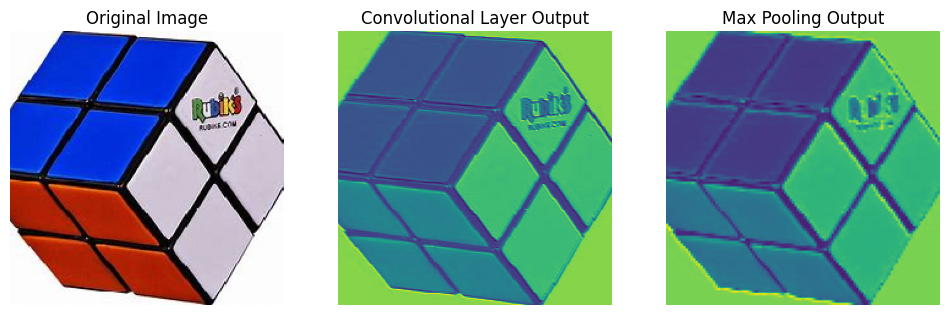

Shape of Flattened Result: (1, 394272)


In [24]:
convolution_result = model.layers[0] (img) # Apply conve pooling result = model.layers[1] (convolution_result) 
# Apply pooling flattened result = model.layers[2] (pooling_result)
p.figure(figsize=(12, 4))
p.subplot(131)
p.title('Original Image')
p.imshow(img[0] / 255.0) # Normalize the pixel values for display
p.axis('off')
p.subplot(132)
p.title('Convolutional Layer Output')
p.imshow(conv_res[0, :,:, 0], cmap='viridis')
p.axis('off')
p.subplot(133)
p.title('Max Pooling Output')
p.imshow(pooling_res[0, :, :, 0], cmap='viridis')
p.axis('off')
p.show()
print("Shape of Flattened Result:", flattened_res.shape)